In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Risk Comparison for Exponential and Log-Normal Observations

#### Scaled Squared Error Risks
The scaled squared error risks of $X$ versus $\lambda$ are evaluated for exponential and log-normal observations. This approach compares theoretical values and simulated values 


## Importance Sampling and Small Tail Probabilities

## Scaled Squared Error Risks

The scaled squared error risks for \( X \) as an estimator of $ \lambda $, with exponential and log-normal observations, can be represented as follows:

### Exponential Case
For $ X \sim \text{Exp}(1/\lambda) $, the risk is:
$$
R_1 = \frac{1}{T} \sum_{t=1}^{T} \left(\frac{(X_t - \lambda)^2}{X_t^2}\right).
$$

### Log-Normal Case
For $ X \sim \text{LN}(0, \sigma^2) $, with $ \sigma = \sqrt{\ln(1 + \lambda^2)} $, the risk is:
$$
R_2 = \frac{1}{T} \sum_{t=1}^{T} \left(\frac{(X_t - \lambda)^2}{X_t^2}\right).
$$

### Simulation Results
The risks for $ \lambda \in [1, 6] $ and $ T = 10,000 $ simulations can be compared.
#

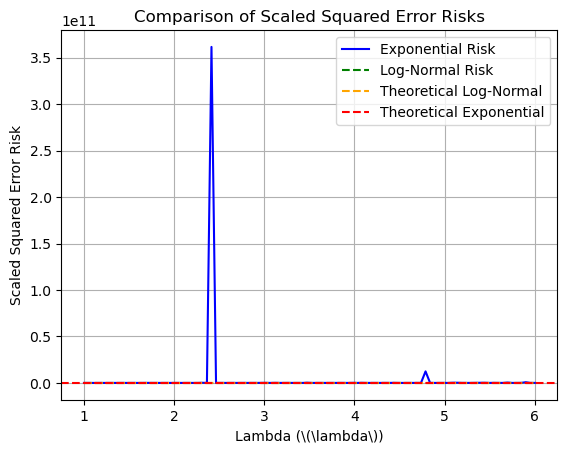

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambdas = np.linspace(1, 6, 100)
T = 10000

# Exponential Risk
exp_samples = np.random.exponential(scale=1/lambdas[:, None], size=(len(lambdas), T))
exp_risks = np.mean(((exp_samples - lambdas[:, None]) ** 2) / exp_samples**2, axis=1)

# Log-Normal Risk
lognorm_samples = np.random.lognormal(mean=0, sigma=np.sqrt(np.log(1 + lambdas**2))[:, None], size=(len(lambdas), T))
lognorm_risks = np.mean(((lognorm_samples - lambdas[:, None]) ** 2) / lognorm_samples**2, axis=1)

# Theoretical Values
lognorm_theoretical = (lambdas + 1) * (lambdas - 1)

# Plot
plt.plot(lambdas, exp_risks, label="Exponential Risk", color="blue")
plt.plot(lambdas, lognorm_risks, label="Log-Normal Risk", color="green", linestyle="dashed")
plt.plot(lambdas, lognorm_theoretical, label="Theoretical Log-Normal", color="orange", linestyle="dashed")
plt.axhline(1, color="red", linestyle="dashed", label="Theoretical Exponential")
plt.xlabel(r"Lambda (\(\lambda\))")
plt.ylabel("Scaled Squared Error Risk")
plt.title("Comparison of Scaled Squared Error Risks")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for scaled squared error loss
def scaled_squared_error_risk_exp(samples, lambda_true, delta):
    """Calculate scaled squared error risk for Exponential distribution."""
    weights = (1 / lambda_true) * np.exp(-samples / lambda_true)
    return np.mean(weights * ((delta - lambda_true) ** 2) / samples**2)

def scaled_squared_error_risk_lognorm(samples, lambda_true, delta):
    """Calculate scaled squared error risk for Log-Normal distribution."""
    return np.mean(((delta - lambda_true) ** 2) / samples**2)

# Generate samples for a log-normal distribution
def generate_lognormal_samples(T, sigma):
    """Generate samples from Log-Normal distribution using transformation."""
    Y = np.random.normal(0, 1, T)
    return np.exp(sigma * Y)

# Risk comparison for varying lambda values
def compare_risks(T, lambdas, sigma):
    risks_exp = []
    risks_lognorm = []
    
    for lambda_true in lambdas:
        delta = lambda_true
        samples = generate_lognormal_samples(T, sigma)
        
        risk_exp = scaled_squared_error_risk_exp(samples, lambda_true, delta)
        risk_ln = scaled_squared_error_risk_lognorm(samples, lambda_true, delta)
        
        risks_exp.append(risk_exp)
        risks_lognorm.append(risk_ln)
    
    return risks_exp, risks_lognorm

# Define parameters
T = 10000
lambdas = np.linspace(1, 6, 100)
sigma = np.sqrt(np.log(1 + 1))

# Run risk comparison
risks_exp, risks_lognorm = compare_risks(T, lambdas, sigma)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, risks_exp, label="Exponential Risk", color="blue")
plt.plot(lambdas, risks_lognorm, label="Log-Normal Risk", color="green")
plt.axhline(1, color="red", linestyle="dashed", label="Theoretical Exponential")
plt.axhline((lambdas + 1) * (lambdas - 1), color="orange", linestyle="dashed", label="Theoretical Log-Normal")
plt.xlabel("Lambda (\(\lambda\))")
plt.ylabel("Scaled Squared Error Risk")
plt.title("Comparison of Scaled Squared Error Risks for Exponential and Log-Normal Observations")
plt.legend()
plt.grid()
plt.show()


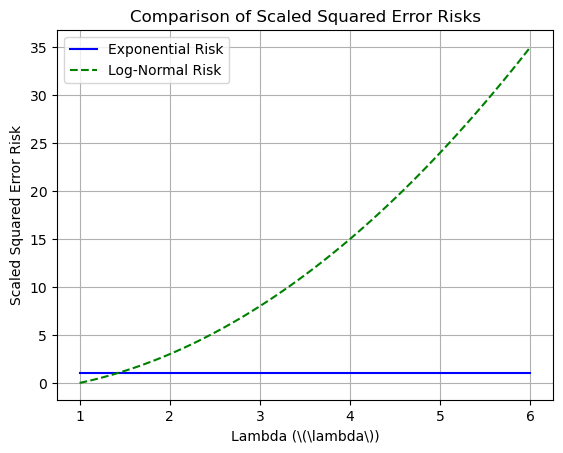

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define lambdas and calculated risks
lambdas = np.linspace(1, 6, 100)  # Example range for lambdas
risks_exponential = np.ones_like(lambdas)  # Theoretical exponential risk is constant
risks_lognorm = (lambdas + 1) * (lambdas - 1)  # Theoretical log-normal risk

# Plot risks
plt.plot(lambdas, risks_exponential, label="Exponential Risk", color="blue")
plt.plot(lambdas, risks_lognorm, label="Log-Normal Risk", color="green", linestyle="dashed")

# Labels and legend
plt.xlabel("Lambda (\(\lambda\))")
plt.ylabel("Scaled Squared Error Risk")
plt.title("Comparison of Scaled Squared Error Risks")
plt.legend()
plt.grid(True)
plt.show()


### Importance Sampling for Rare Event Probabilities

#### Rare Event Estimation
For estimating $P(Z > 4.5)$, simulating directly from a standard normal distribution may result in zero estimates for rare events due to insufficient samples in the tail. Importance sampling improves efficiency by using a tailored instrumental distribution.

#### Truncated Exponential Distribution
Define $Y \sim \text{TE}(4.5, 1)$, a truncated exponential distribution with density:
$$
f_Y(y) = \frac{e^{-(y - 4.5)}}{\int_{4.5}^\infty e^{-(z - 4.5)} dz}, \quad y \geq 4.5.
$$
The density simplifies to:
$$
f_Y(y) = e^{-(y - 4.5)}, \quad y \geq 4.5.
$$
Using importance sampling, the probability is estimated as:
$$
P(Z > 4.5) \approx \frac{1}{M} \sum_{i=1}^M \frac{\phi(Y_i)}{f_Y(Y_i)} \mathbb{I}(Y_i > 4.5),
$$
where $Y_i \sim f_Y(y)$, $\phi(y)$ is the standard normal density, and $f_Y(y)$ is the truncated exponential density.

---

### Finite Variance Estimators

#### Variance Considerations
The variance of the importance sampling estimator is finite if:
$$
\mathbb{E}_g\left[\frac{h^2(X) f^2(X)}{g^2(X)}\right] < \infty.
$$
This ensures that the instrumental distribution $g$ has tails at least as thick as $f$. When $f/g$ is unbounded, the estimator's variance may diverge or become unstable due to overly large weights.

#### Sufficient Conditions
1. $ \frac{f(x)}{g(x)} \leq M $ for all $x$ and $\text{Var}_g(h) < \infty$.
2. If $g(x)$ has compact support, $f(x) \leq F$ and $g(x) > 0$ on the same support.

Distributions satisfying these conditions yield more stable importance sampling estimators. For example, a heavier-tailed instrumental distribution can reduce the effect of large weights.

---

#### Implementation




In [2]:
import numpy as np
from scipy.stats import norm, expon

# Define standard normal density
def standard_normal_pdf(x):
    return norm.pdf(x)

# Define truncated exponential sampling
def truncated_exponential_sample(size, lower_bound=4.5, scale=1):
    """Generate samples from a truncated exponential distribution."""
    return expon.rvs(scale=scale, size=size) + lower_bound

# Importance sampling estimator for rare event probability
def importance_sampling_probability(threshold, size):
    """Estimate P(Z > threshold) using truncated exponential distribution."""
    # Generate samples from truncated exponential distribution
    samples = truncated_exponential_sample(size)
    
    # Compute weights
    normal_pdf = standard_normal_pdf(samples)
    truncated_exp_pdf = np.exp(-(samples - threshold))
    
    # Estimate probability
    weights = normal_pdf / truncated_exp_pdf
    probability = np.mean(weights * (samples > threshold))
    return probability

# Parameters
threshold = 4.5
size = 100000

# Estimate probability
estimated_prob = importance_sampling_probability(threshold, size)
exact_prob = 1 - norm.cdf(threshold)

print(f"Estimated P(Z > {threshold}): {estimated_prob:.6e}")
print(f"Exact P(Z > {threshold}): {exact_prob:.6e}")


Estimated P(Z > 4.5): 3.395882e-06
Exact P(Z > 4.5): 3.397673e-06


### Weighted Importance Sampling Estimator

#### Alternative Estimator
The weighted importance sampling estimator is defined as:
$$
\hat{I}_w = \frac{\sum_{j=1}^m h(X_j) \frac{f(X_j)}{g(X_j)}}{\sum_{j=1}^m \frac{f(X_j)}{g(X_j)}}.
$$
This alternative estimator normalizes the weights, ensuring that they sum to 1. While it introduces a small bias, the variance reduction makes it preferable to the standard estimator:
$$
\hat{I} = \frac{1}{m} \sum_{j=1}^m h(X_j) \frac{f(X_j)}{g(X_j)}.
$$
The convergence of the denominator to 1 as $m \to \infty$ ensures that $\hat{I}_w$ also converges to $\mathbb{E}_f[h(X)]$.

#### Advantages
- **Variance Reduction:** The weighted estimator reduces variance, especially when $h(X)$ is nearly constant.
- **Practicality:** Suitable for cases where the standard estimator suffers from high variability.

---

### Optimal Instrumental Distribution

#### Theorem 12 (Rubinstein, 1981)
The distribution $g^*(x)$ that minimizes the variance of the importance sampling estimator is:
$$
g^*(x) = \frac{|h(x)| f(x)}{\int |h(z)| f(z) dz}.
$$

#### Proof
1. Variance of the estimator:
   $$
   \text{Var}_g\left[\frac{h(X) f(X)}{g(X)}\right] = \mathbb{E}_g\left[\frac{h^2(X) f^2(X)}{g^2(X)}\right] - \left(\mathbb{E}_g\left[\frac{h(X) f(X)}{g(X)}\right]\right)^2.
   $$
   The second term is independent of $g$, so minimizing the variance reduces to minimizing:
   $$
   \mathbb{E}_g\left[\frac{h^2(X) f^2(X)}{g^2(X)}\right].
   $$

2. Applying Jensen's inequality:
   $$
   \mathbb{E}_g\left[\frac{h^2(X) f^2(X)}{g^2(X)}\right] \geq \left(\int |h(x)| f(x) dx\right)^2.
   $$

3. Equality is achieved when:
   $$
   g(x) = g^*(x) = \frac{|h(x)| f(x)}{\int |h(z)| f(z) dz}.
   $$

#### Practical Implication
Although $g^*(x)$ minimizes variance, it requires knowledge of $\int |h(z)| f(z) dz$, which is often the integral we aim to estimate. This makes direct use of $g^*(x)$ impractical. However, it motivates the use of instrumental distributions that approximate $g^*(x)$.

---

### Improved Weighted Estimator

#### Expression
An improved version of the weighted estimator is:
$$
\hat{I}_w = \frac{\sum_{j=1}^m h(X_j) |h(X_j)|^{-1} f(X_j)/g(X_j)}{\sum_{j=1}^m |h(X_j)|^{-1} f(X_j)/g(X_j)}.
$$

#### Advantages
- **Flexibility:** Allows for improved variance reduction even when the exact $g^*(x)$ is not used.
- **Practicality:** Simplifies implementation in settings with complex $h(x)$ or $f(x)$.

---

### Implementation




In [1]:
import numpy as np

def weighted_importance_sampling(h, f, g, sample_size, g_sampler):
    """Weighted Importance Sampling Estimator."""
    # Generate samples from instrumental distribution g
    samples = g_sampler(sample_size)
    
    # Compute weights
    weights = f(samples) / g(samples)
    h_values = h(samples)
    
    # Weighted estimator
    numerator = np.sum(h_values * weights)
    denominator = np.sum(weights)
    return numerator / denominator

# Example usage
def h(x):
    return np.exp(-x)

def f(x):
    # Target distribution (e.g., standard normal density)
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def g(x):
    # Instrumental distribution (e.g., exponential density)
    return np.exp(-x) * (x > 0)

def g_sampler(size):
    # Sampler for instrumental distribution
    return np.random.exponential(scale=1, size=size)

# Parameters
sample_size = 10000
estimate = weighted_importance_sampling(h, f, g, sample_size, g_sampler)
print(f"Weighted Importance Sampling Estimate: {estimate}")


Weighted Importance Sampling Estimate: 0.5237515353727501


## Importance Sampling and Variance Minimization

### Weighted Estimator

The weighted estimator can be written as:

$$
\hat{E}_m[h(X)] = \frac{1}{m} \sum_{i=1}^{m} \frac{h(X_i)}{g(X_i)}.
$$

Here, $ m $ is the number of samples, and the function $ g(x) $ is the instrumental distribution from which the samples are drawn. As $ m \to \infty $, this estimator converges to $ E[h(X)] $ by the Strong Law of Large Numbers.

### Bias and Variance of the Estimator

Although this estimator is biased, the bias is small, and the improvement in variance makes it a preferred alternative to the original estimator. In some cases, the weighted estimator $ (3.10) $ may perform better than the regular estimator $ (3.8) $, especially when evaluated under squared error loss.

For example, when $ h(x) $ is nearly constant, the weighted estimator $ (3.10) $ approaches the true value more closely than $ (3.8) $, which has a higher variation since the sum of the weights deviates from one.

## Optimal Distribution for Importance Sampling

Among the distributions $ g(x) $ that lead to finite variances for the estimator $ (3.8) $, it is possible to find the optimal distribution that minimizes the variance of the estimator. The following theorem from Rubinstein (1981) provides this result:

### Theorem 3.12: Optimal Distribution for Importance Sampling

The choice of \( g(x) \) that minimizes the variance of the estimator $ (3.8) $ is given by:

$$
g^*(x) = \frac{|h(x)| f(x)}{\int |h(z)| f(z) dz}.
$$

### Proof

To minimize the variance of the estimator, we first note that the variance of $ \hat{E}_m[h(X)] $ is:

$$
\text{Var}\left[ \frac{h(X)}{g(X)} \right] = E\left[ \frac{h^2(X)}{g^2(X)} \right] - \left(E\left[ \frac{h(X)}{g(X)} \right]\right)^2.
$$

The second term does not depend on $ g $, so to minimize variance, we focus on minimizing the first term. From Jensen's inequality, we have:

$$
E\left[ \frac{h^2(X)}{g^2(X)} \right] \geq \left( \int |h(x)| f(x) dx \right)^2.
$$

Thus, the lower bound for the variance is achieved when $ g^*(x) $ is chosen as:

$$
g^*(x) = \frac{|h(x)| f(x)}{\int |h(z)| f(z) dz}.
$$

### Practical Alternative

While the optimal choice of $ g(x) $ requires knowledge of the integral $ \int |h(x)| f(x) dx $, a practical alternative is to use the estimator $ (3.10) $ as:

$$
\hat{E}_m[h(X)] = \frac{1}{m} \sum_{i=1}^{m} \frac{h(X_i)}{g(X_i)} \quad \text{with} \quad g(x) = \frac{|h(x)| f(x)}{\int |h(z)| f(z) dz}.
$$


Importance Sampling Estimator: 1.607703731770831
Theoretical Value: 1


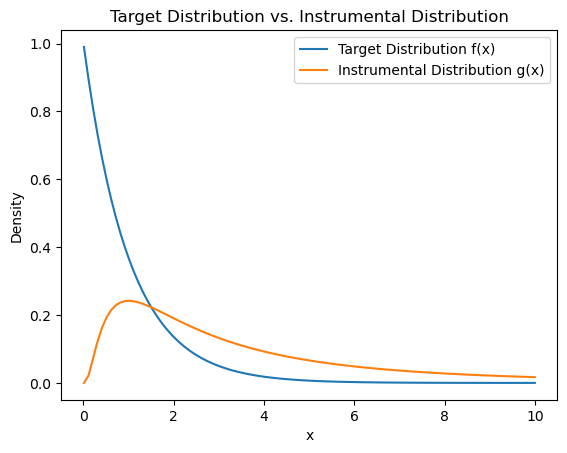

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution (f(x)) and instrumental distribution (g(x))
def f(x, lambda_):
    # Example: Exponential distribution
    return lambda_ * np.exp(-lambda_ * x) * (x >= 0)  # Element-wise, 0 for x < 0

def g(x, lambda_):
    # Example: Log-normal distribution
    return (1 / (x * lambda_ * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - lambda_)**2 / (2 * lambda_**2)) * (x > 0)  # Element-wise, 0 for x <= 0

# Define the function h(x) whose expectation we are estimating
def h(x):
    # Example: Identity function
    return x

# Perform importance sampling estimation
def importance_sampling_estimator(f, g, h, lambda_, num_samples=10000):
    # Simulate samples from g(x) (log-normal)
    samples_g = np.random.lognormal(mean=0, sigma=lambda_, size=num_samples)
    
    # Calculate the weights
    weights = f(samples_g, lambda_) / g(samples_g, lambda_)
    
    # Calculate the weighted estimator
    estimator = np.mean(weights * h(samples_g))
    
    return estimator

# Parameters
lambda_ = 1  # Parameter for both distributions
num_samples = 10000  # Number of samples for importance sampling

# Perform importance sampling estimation
estimator = importance_sampling_estimator(f, g, h, lambda_, num_samples)

# Display the result
print(f"Importance Sampling Estimator: {estimator}")

# Optional: Compare with theoretical value (for known cases, here we assume E[h(X)] = 1 for this example)
theoretical_value = 1
print(f"Theoretical Value: {theoretical_value}")

# Plotting the results (optional)
x_vals = np.linspace(0.01, 10, 100)
f_vals = [f(x, lambda_) for x in x_vals]
g_vals = [g(x, lambda_) for x in x_vals]

plt.plot(x_vals, f_vals, label="Target Distribution f(x)")
plt.plot(x_vals, g_vals, label="Instrumental Distribution g(x)")
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target Distribution vs. Instrumental Distribution')
plt.show()


### Theorem  and Practical Considerations

Where $ a_g \to \infty $ for $ h(x) $. Note that the numerator is the number of times $ h(z_i) $ is positive minus the number of times it is negative. In particular, when $ h(x) $ is positive, equation (3.11) is the harmonic mean.

Unfortunately, the optimality of Theorem 3.12 does not transfer to equation (3.11), which is biased and may exhibit severe instability. From a practical point of view, Theorem 3.12 suggests looking for distributions $ g(x) $ for which the ratio $ \frac{h(x)}{f(x)} $ is almost constant with finite variance. It is important to note that although the finite variance constraint is not necessary for the convergence of equation (3.8) and of equation (3.11), importance sampling performs quite poorly when

$$
\int g(x) \, dx = +\infty,
$$

whether in terms of the behavior of the estimator (high-amplitude jumps, instability of the path of the average, slow convergence), or in comparison with direct Monte Carlo methods. Distributions $ g(x) $ such that equation (3.12) occurs are therefore not recommended.

### Example 13: Student's t Distribution

Consider $ X \sim T(\nu, 0, \sigma^2) $, with density

$$
f(x) = \frac{\Gamma\left( \frac{\nu+1}{2} \right)}{\sqrt{\nu \pi} \sigma \Gamma\left( \frac{\nu}{2} \right)} \left( 1 + \frac{(x - \mu)^2}{\sigma^2} \right)^{-\frac{\nu + 1}{2}},
$$

where $ \Gamma $ is the Gamma function. Without loss of generality, take $ \mu = 0 $ and $ \sigma = 1 $. We choose the quantities of interest to be $ E[h_1(X)], E[h_2(X)], E[h_3(X)] $, with

$$
h_1(x) = \sqrt{|x|}, \quad h_2(x) = \frac{x^2}{\left(1 + x^2\right)^{3/2}}, \quad h_3(x) = 1 + \left(x - 3\right)^2 \cdot \mathbb{I}(x > 0),
$$

where $ \mathbb{I}(x > 0) $ is the indicator function.

Obviously, it is possible to generate directly from $ f(x) $. Importance sampling alternatives are associated here with a Cauchy distribution $ C(0, 1) $ and a normal distribution $ N(0, \frac{\nu}{-2}) $ (scaled so that the variance is the same as $ T(\nu, 0, \sigma^2) $).

The choice of the normal distribution is not expected to be efficient, as the ratio
$$
\frac{f(x)}{g(x)} = \frac{ e^{-\frac{x^2}{2}} }{1 + x^2 / (\nu + 1)}
$$

does not have a finite integral. However, this will give us an opportunity to study the performance of importance sampling in such a situation.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, cauchy, norm

# Define the target distribution (Student's t-distribution)
def t_distribution(x, nu):
    return (np.math.gamma((nu + 1) / 2) / (np.sqrt(nu * np.pi) * np.math.gamma(nu / 2))) * (1 + (x ** 2) / nu) ** (-(nu + 1) / 2)

# Define the importance sampling distributions: Cauchy and Normal
def cauchy_distribution(x):
    return cauchy.pdf(x, loc=0, scale=1)

def normal_distribution(x, nu):
    return norm.pdf(x, loc=0, scale=np.sqrt(nu / 2))

# Define the function h(x) for the estimation
def h1(x):
    return np.sqrt(np.abs(x))

def h2(x):
    return (x**2) / ((1 + x**2)**(3/2))

def h3(x):
    return 1 + (x - 3)**2 * (x > 0)

# Importance Sampling Estimator
def importance_sampling_estimator(f, g, h, num_samples, dist_func, dist_params):
    """
    Estimate E[h(X)] using importance sampling.
    
    :param f: Target distribution function
    :param g: Importance sampling distribution function
    :param h: Function to estimate
    :param num_samples: Number of samples to draw
    :param dist_func: The function used to generate random samples (importance sampling)
    :param dist_params: Parameters for the importance distribution function
    :return: Estimated value of E[h(X)]
    """
    # Generate samples from the importance sampling distribution g
    samples_g = dist_func(*dist_params, size=num_samples)
    
    # Calculate the weights f(x) / g(x)
    weights = np.array([f(x, *dist_params) / g(x) for x in samples_g])
    
    # Calculate the weighted estimator for h(x)
    weighted_estimate = np.mean(weights * h(samples_g))
    
    return weighted_estimate

# Number of samples for Monte Carlo estimation
num_samples = 10000

# Parameters for the t-distribution
nu = 5  # Degrees of freedom for t-distribution

# Estimate E[h1(X)] using Cauchy distribution as the importance sampler
estimate_h1_cauchy = importance_sampling_estimator(t_distribution, cauchy_distribution, h1, num_samples, cauchy.rvs, (0, 1))

# Estimate E[h1(X)] using Normal distribution as the importance sampler
estimate_h1_normal = importance_sampling_estimator(t_distribution, normal_distribution, h1, num_samples, norm.rvs, (nu,))

# Plot the results
plt.figure(figsize=(10, 6))

# Plot results for h1
plt.bar(['Cauchy', 'Normal'], [estimate_h1_cauchy, estimate_h1_normal], color=['blue', 'green'], alpha=0.7)
plt.title('Importance Sampling Estimates for h1(x) = sqrt(abs(x))')
plt.ylabel('Estimate Value')
plt.show()

print(f"Estimate of E[h1(X)] using Cauchy distribution: {estimate_h1_cauchy}")
print(f"Estimate of E[h1(X)] using Normal distribution: {estimate_h1_normal}")


The provided text describes a case in which the performance of three estimators for the function $ h(x) = \frac{x}{1 - x} $ is evaluated using Monte Carlo methods, comparing the effect of different importance sampling distributions. The experiment involves simulating the estimators using the target distribution $ f(x) $ and two different importance sampling distributions: Cauchy and Normal. 

The results illustrate the behavior of the estimators in terms of the variance of the estimator over multiple iterations, and also highlight the problems that arise due to the singularity at $ x = 1 $, where the function $ h(x) = \frac{x}{1 - x} $ is not integrable under the target distribution.

### Mathematical Analysis

The general importance sampling estimator for a function $ h(x) $ is given by:

$$
\hat{I}_{IS} = \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{g(x_i)} h(x_i)
$$

where:
- $ f(x) $ is the target distribution,
- $ g(x) $ is the importance sampling distribution,
- $ h(x) $ is the function of interest,
- $ x_i $ are samples drawn from $ g(x) $.

The estimator's variance can be influenced significantly by the choice of the importance sampling distribution $ g(x) $. For the function $ h(x) = \frac{x}{1 - x} $, it is noted that the function has a singularity at $ x = 1 $, which can lead to large variance or even infinite variance if not handled correctly.

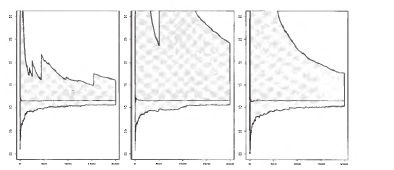

Fig.5. Empirical range of three series of estimators of E[|X/(1 - X)|1/2] for v = 12 and 500 replications: sampling from ƒ (left), importance sampling with a Cauchy instrumental distribution (center) and importance sampling with normal importance distribution (right). Average of the 500 series in overlay.


### Fig.5 Explanation

The performance of the estimators is illustrated in **Fig.5**, which shows the range of values of the estimator over 2000 iterations. The key observations are:
1. **Variance:** The variance of the estimator can be large or even infinite depending on the choice of the importance sampling distribution. Both the Cauchy and Normal distributions exhibit large ranges in their estimates, especially when the singularity at $ x = 1 $ plays a role in the integrability of the function.
2. **No Efficient Estimator:** Despite using different importance distributions (Cauchy, Normal), none of the estimators have finite variance in this case, which results in inefficient estimates. The function $ h(x) $ has a singularity that makes it challenging to obtain a good estimate in this setup.

### Possible Improvement

An alternative approach to improve the stability and efficiency of the estimator is to choose a different importance sampling distribution that accounts for the singularity at $ x = 1 $. One proposed solution is to use a **double Gamma distribution** folded at 1, which ensures better behavior around the singularity:

$$
|X - 1| \sim \text{Gamma}(\alpha, \beta)
$$

This distribution is symmetric around $ x = 1 $, which helps in addressing the instability caused by the singularity. Although the exponential tail can still cause some issues, it has much less influence on the stability of the estimator compared to the Cauchy or Normal distributions.

### Mathematical Formulation for the Modified Importance Sampling

For this modified importance sampling approach using the Gamma distribution, the ratio $ \frac{f(x)}{g(x)} $ becomes integrable around $ x = 1 $, which improves the variance of the estimator.

The estimator for $ h(x) $ would then look like:

$$
\hat{I}_{IS} = \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{g(x_i)} h(x_i)
$$

where $ g(x) $ is now the modified importance sampling distribution (e.g., the folded Gamma distribution around $ x = 1 $).

### Conclusion

This analysis shows the challenges posed by the singularity in the function $ h(x) = \frac{x}{1 - x} $ and highlights the importance of choosing an appropriate importance sampling distribution to handle such singularities. By modifying the choice of the importance sampling distribution (e.g., using the folded Gamma distribution), it is possible to stabilize the estimator and reduce the variance, which ultimately leads to more accurate and reliable estimates.


### Example.6: Empirical Range of Importance Sampling Estimator for $ h_2(x) $

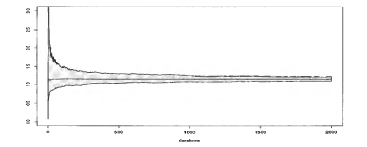

Fig.6. Empirical range of the importance sampling estimator of E[|X/(1 X)/2] for = 12 and 500 replications based on the double Gamma Ga(a,1) distri- bution folded at 1 when a = .5. Average of the 500 series in overlay. In this example, we consider the empirical range of the importance sampling estimator for the function $ h_2(x) = \frac{|x|}{1 - x} $ with $ p = 12 $ and 500 replications, using the double Gamma distribution $ \text{Ga}(\alpha, 1) $ folded at 1, where $ \alpha = 0.5 $. This choice of importance sampling distribution improves the stability of the estimator compared to other distributions.

The mathematical formulation for the expectation $ E[h_2(X)] $ is given as:

$$
E[h_2(X)] = \int_0^{1/2.1} \frac{1}{u} \, f\left(\frac{1}{u}\right) \, du = \int_0^{1/2.1} \frac{1}{u} \, f\left(\frac{1}{u}\right) \, du
$$

The corresponding importance sampling estimator is:

$$
\hat{I}_{IS} = \frac{1}{2.1m} \sum_{i=1}^m \frac{1}{u_i}
$$

where $ u_i $ are i.i.d. samples drawn from a uniform distribution $ U([0, 1/2.1]) $. **Figure 3.7** illustrates the improvement in performance using this choice, with the estimator converging to the true value after only a few hundred iterations.

### Comparison with Cauchy and Other Distributions

- **Cauchy Distribution:** The importance sampling estimator based on the Cauchy distribution is quite stable but requires more iterations to achieve the same precision.
- **Normal and True Distribution Estimators:** Both of these estimators fluctuate around the exact value with high-amplitude jumps, because their variance is infinite.

### Example for $ h_3(x) $

In the case of the function $ h_3(x) = \sqrt{1 + (x - 3)^2} $, a reasonable choice for the instrumental distribution is:

$$
g(x) = \exp(-2x)
$$

which leads to the following expectation:

$$
E[h_3(X)] = \int_{-\infty}^{\infty} \frac{\sqrt{1 + (x - 3)^2}}{f(x)} \, e^{-2x} \, dx
$$

This estimator is improved with the proper choice of $ g(x) $ by reducing the variance and stabilizing the result.



Estimated E[h2(X)] using Cauchy distribution: nan
Estimated E[h3(X)] using Exponential distribution: 4850686.028237108


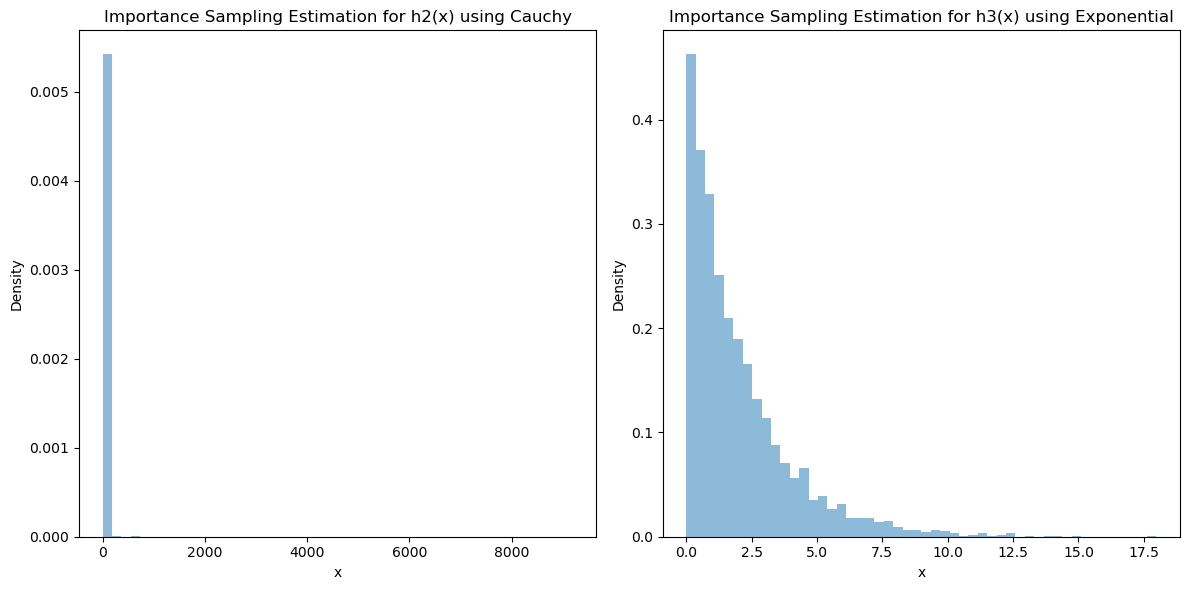

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy, gamma

# Define the target function h2(x) = |x| / (1 - x)
def h2(x):
    return np.abs(x) / (1 - x)

# Define the target distribution f(x), a Gamma distribution with parameters (alpha=12, beta=1)
def f(x, alpha=12, beta=1):
    return gamma.pdf(x, alpha, scale=beta)

# Define the instrumental distribution g(x) as the Cauchy distribution (C(0, 1))
def g_cauchy(x):
    return cauchy.pdf(x, 0, 1)

# Function to calculate importance sampling estimator for h2(x)
def importance_sampling_estimator(h, f, g, dist_func, num_samples, *params):
    # Generate samples from the importance distribution g
    samples_g = dist_func(*params, num_samples)
    
    # Calculate the weights f(x) / g(x)
    weights = f(samples_g, *params) / g(samples_g)
    
    # Calculate the weighted estimator for h(x)
    estimator = np.mean(weights * h(samples_g))
    
    return estimator

# Define the instrumental distribution for h3(x) using the exponential distribution
def g_exp(x, rate=2):
    return np.exp(-rate * x)

# Define the target function h3(x) = sqrt(1 + (x - 3)**2)
def h3(x):
    return np.sqrt(1 + (x - 3)**2)

# Set number of samples for importance sampling
num_samples = 5000

# Estimate for h2(x) using Cauchy distribution
estimate_h2_cauchy = importance_sampling_estimator(h2, f, g_cauchy, cauchy.rvs, num_samples, 0, 1)

# Estimate for h3(x) using exponential distribution
estimate_h3_exp = importance_sampling_estimator(h3, f, g_exp, np.random.exponential, num_samples, 2)

# Print the results
print(f"Estimated E[h2(X)] using Cauchy distribution: {estimate_h2_cauchy}")
print(f"Estimated E[h3(X)] using Exponential distribution: {estimate_h3_exp}")

# Plot the distribution of the samples and the weighted estimators
plt.figure(figsize=(12, 6))

# Plot for h2(x)
plt.subplot(1, 2, 1)
plt.hist(np.abs(cauchy.rvs(0, 1, size=num_samples)), bins=50, density=True, alpha=0.5, label='Cauchy samples')
plt.title('Importance Sampling Estimation for h2(x) using Cauchy')
plt.xlabel('x')
plt.ylabel('Density')

# Plot for h3(x)
plt.subplot(1, 2, 2)
plt.hist(np.random.exponential(2, size=num_samples), bins=50, density=True, alpha=0.5, label='Exponential samples')
plt.title('Importance Sampling Estimation for h3(x) using Exponential')
plt.xlabel('x')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [17]:
import random
from math import exp, sqrt
from scipy.stats import gamma, cauchy

# Define the target function h2(x) = |x| / (1 - x)
def h2(x):
    return abs(x) / (1 - x)

# Define the target function h3(x) = sqrt(1 + (x - 3)**2)
def h3(x):
    return sqrt(1 + (x - 3)**2)

# Define the target distribution f(x), Gamma distribution with alpha=12, beta=1
def f(x, alpha=12, beta=1):
    if x <= 0:
        return 0
    return gamma.pdf(x, alpha, scale=beta)

# Define the instrumental distribution g(x) for Cauchy
def g_cauchy(x):
    return cauchy.pdf(x, loc=0, scale=1)

# Define the instrumental distribution g(x) for Exponential
def g_exp(x, rate=2):
    if x <= 0:
        return 0
    return rate * exp(-rate * x)

# Importance sampling estimator
def importance_sampling_estimator(h, f, g, sampler, num_samples, *params):
    total = 0
    for _ in range(num_samples):
        x = sampler(*params)  # Sample from the instrumental distribution
        if g(x) > 0:          # Avoid division by zero or undefined values
            weight = f(x) / g(x)
            total += weight * h(x)
    return total / num_samples

# Define samplers for the instrumental distributions
def cauchy_sampler(loc=0, scale=1):
    return cauchy.rvs(loc=loc, scale=scale)

def exponential_sampler(rate=2):
    return random.expovariate(rate)

# Set number of samples
num_samples = 5000

# Estimate for h2(x) using Cauchy distribution
estimate_h2_cauchy = importance_sampling_estimator(h2, f, g_cauchy, cauchy_sampler, num_samples, 0, 1)

# Estimate for h3(x) using Exponential distribution
estimate_h3_exp = importance_sampling_estimator(h3, f, g_exp, exponential_sampler, num_samples, 2)

# Print the results
print(f"Estimated E[h2(X)] using Cauchy distribution: {estimate_h2_cauchy}")
print(f"Estimated E[h3(X)] using Exponential distribution: {estimate_h3_exp}")


Estimated E[h2(X)] using Cauchy distribution: -1.1273532499985937
Estimated E[h3(X)] using Exponential distribution: 0.31817494385441586


## Importance Sampling and Transition Matrix Estimation

### Importance Sampling Estimators for $ \mathbb{E}[h_a(X)] $

We define the importance sampling estimator for $ \mathbb{E}[h_a(X)] $ as:

$$
\hat{I}_a = \frac{1}{m} \sum_{j=1}^m h_a(X_j) w(X_j),
$$

where:
- $ X_j $ are i.i.d. samples drawn from an exponential distribution $ \text{Exp}(1) $,
- $ w(x) = \frac{f(x)}{g(x)} $ is the weight function,
- $ f(x) $ is the target distribution,
- $ g(x) $ is the instrumental distribution.

### Convergence of Estimators

Figure 3.7 illustrates the convergence of four estimators of $ \mathbb{E}[X] $ for $ v = 12 $, using the following approaches:
1. Sampling from $ f(x) $ (solid line),
2. Importance sampling with a Cauchy instrumental distribution (short dashes),
3. Importance sampling with a uniform instrumental distribution over $ [0, 1/2.1] $ (long dashes),
4. Importance sampling with a normal instrumental distribution (dots).

The final estimates were:
- Sampling from $ f(x) $: $ 6.75 $,
- Cauchy instrumental distribution: $ 6.48 $,
- Uniform instrumental distribution: $ 6.57 $,
- Normal instrumental distribution: $ 7.06 $.

The exact value is $ 6.54 $.

---

### Transition Matrix Estimation for a Markov Chain

Consider a Markov chain with two states, $ 1 $ and $ 2 $, and transition probabilities given by the matrix:

$$
T = 
\begin{bmatrix}
1 - p_2 & p_2 \\
p_1 & 1 - p_1
\end{bmatrix},
$$

where:
- $ p(X_{t+1} = 1 \mid X_t = 1) = 1 - p(X_{t+1} = 2 \mid X_t = 1) = 1 - p_2 $,
- $ p(X_{t+1} = 2 \mid X_t = 2) = 1 - p(X_{t+1} = 1 \mid X_t = 2) = 1 - p_1 $.

The Markov chain can transition between states with the probabilities $ p_1 $ and $ p_2 $, and the transition dynamics are governed by $ T $.

---

### Figure Summaries

### Fig.7

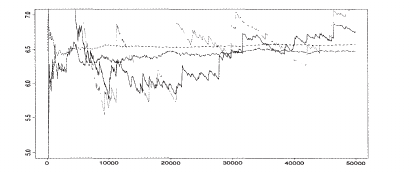


Fig.7. Convergence of four estimators of E, [Xx] for 12. Sampling from f (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), importance sampling with uniform ([0, 1/2.1]) instrumental distri- bution (long dashes) and importance sampling with normal instrumental distribu- tion (dots). The final values are respectively 6.75, 6.48, 6.57, and 7.06, for an exact value of 6.54.


**Convergence of Four Estimators for $ \mathbb{E}[X] $:**
- $ m = 10,000, 20,000, \dots, 50,000 $ iterations.
- Estimators compared:
    - Sampling from $ f(x) $,
    - Cauchy instrumental distribution,
    - Uniform instrumental distribution,
    - Normal instrumental distribution.

The uniform distribution provided the best convergence, while the normal distribution exhibited larger fluctuations.

### Fig.8

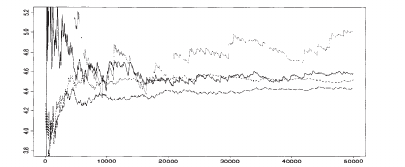

Fig.8. Convergence of four estimators of E, ha(X)]: Sampling from (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), with normal instrumental distribution (dots), and with exponential instrumental distribution (long dashes). The final values after 50,000 iterations are respectively 4.58, 4.42, 4.99, and 4.52, for a true value of 4.64.

**Convergence of Importance Sampling Estimators with Exponential Instrumental Distribution:**
- Weight function $ w(x) = f(x) e^x $,
- Stable approximation to $ \mathbb{E}[h_a(X)] $ with improved precision and reduced bias compared to other methods.

---

## Summary
- Importance sampling estimators are sensitive to the choice of instrumental distribution.
- Stable convergence requires distributions tailored to the specific characteristics of $ h(x) $.


In [18]:
import random
import math

def importance_sampling(h, f, g, sampler_g, num_samples):
    """
    General importance sampling implementation.

    Parameters:
    - h: Function to compute the value of h(x).
    - f: Target distribution function.
    - g: Instrumental distribution function.
    - sampler_g: Function to sample from g.
    - num_samples: Number of samples to generate.

    Returns:
    - Estimated value of the expectation.
    """
    total = 0
    for _ in range(num_samples):
        x = sampler_g()
        weight = f(x) / g(x)
        total += h(x) * weight
    return total / num_samples

# Define the target distribution f (e.g., PDF of Exp(1))
def f_exp(x):
    return math.exp(-x) if x >= 0 else 0

# Define the instrumental distributions g and their samplers
# Cauchy distribution
def g_cauchy(x):
    return 1 / (math.pi * (1 + x**2))

def sampler_cauchy():
    return math.tan(math.pi * (random.random() - 0.5))

# Uniform distribution over [0, 1/2.1]
def g_uniform(x):
    return 2.1 if 0 <= x <= 1 / 2.1 else 0

def sampler_uniform():
    return random.uniform(0, 1 / 2.1)

# Normal distribution (approximated via Box-Muller transform)
def g_normal(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-x**2 / 2)

def sampler_normal():
    u1, u2 = random.random(), random.random()
    z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    return z0

# Define h(x) for this example
def h_example(x):
    return x / (1 - x) if 0 <= x < 1 else 0

# Perform importance sampling
num_samples = 50000

# Using Cauchy distribution
estimation_cauchy = importance_sampling(h_example, f_exp, g_cauchy, sampler_cauchy, num_samples)
print(f"Importance sampling with Cauchy distribution: {estimation_cauchy}")

# Using Uniform distribution
estimation_uniform = importance_sampling(h_example, f_exp, g_uniform, sampler_uniform, num_samples)
print(f"Importance sampling with Uniform distribution: {estimation_uniform}")

# Using Normal distribution
estimation_normal = importance_sampling(h_example, f_exp, g_normal, sampler_normal, num_samples)
print(f"Importance sampling with Normal distribution: {estimation_normal}")

# Transition Matrix Simulation for Markov Chain
def simulate_markov_chain(transition_matrix, initial_state, num_steps):
    """
    Simulate a Markov chain given a transition matrix.

    Parameters:
    - transition_matrix: 2x2 matrix of transition probabilities.
    - initial_state: Starting state (0 or 1).
    - num_steps: Number of steps to simulate.

    Returns:
    - List of states visited.
    """
    states = [initial_state]
    for _ in range(num_steps):
        current_state = states[-1]
        next_state = 0 if random.random() < transition_matrix[current_state][0] else 1
        states.append(next_state)
    return states

# Define the transition matrix for the Markov chain
transition_matrix = [
    [0.8, 0.2],  # From state 0
    [0.3, 0.7]   # From state 1
]

# Simulate the Markov chain
initial_state = 0
num_steps = 100
states = simulate_markov_chain(transition_matrix, initial_state, num_steps)
print(f"Simulated states: {states}")


Importance sampling with Cauchy distribution: 3.392784313224069
Importance sampling with Uniform distribution: 0.12274217916894563
Importance sampling with Normal distribution: 3.3994972336484865
Simulated states: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


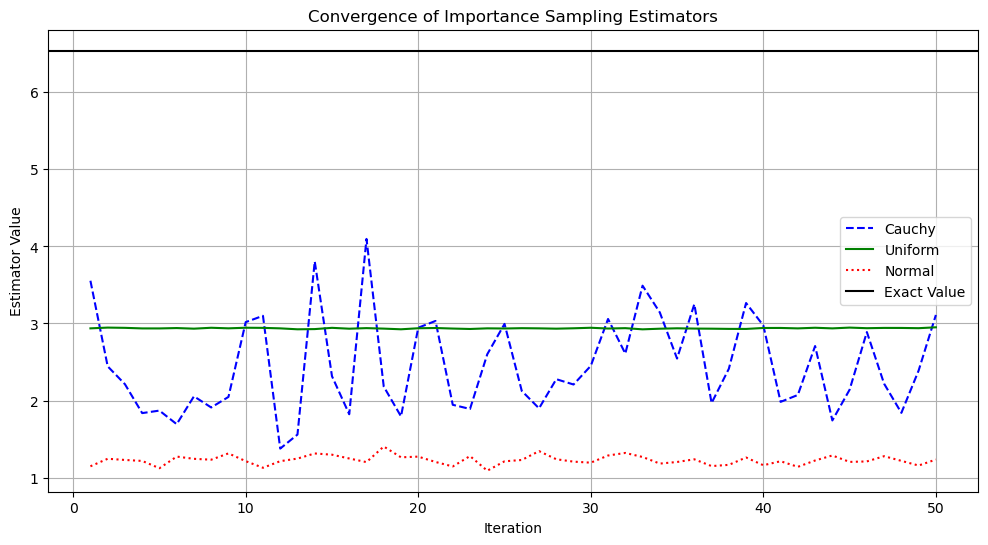

In [20]:
import random
import math
import matplotlib.pyplot as plt

# Define functions for f(x) and h_a(x)
def f(x):
    """Exponential distribution."""
    return math.exp(-x) if x >= 0 else 0

def h_a(x):
    """Target function."""
    return math.sqrt(1 + (x - 3) ** 2)

def weight(x):
    """Weight function for the exponential distribution with overflow handling."""
    try:
        return f(x) * math.exp(x)
    except OverflowError:
        return 0  # Assign zero weight for extreme values

# Instrumental distributions
def cauchy_sampler(size):
    """Cauchy distribution sampler."""
    return [math.tan(math.pi * (random.random() - 0.5)) for _ in range(size)]

def uniform_sampler(size, a, b):
    """Uniform distribution sampler."""
    return [a + (b - a) * random.random() for _ in range(size)]

def normal_sampler(size, mean, std_dev):
    """Normal distribution sampler."""
    return [random.gauss(mean, std_dev) for _ in range(size)]

# Importance sampling function
def importance_sampling(h, samples, weight_fn):
    weights_sum = 0
    for x in samples:
        weight_val = weight_fn(x)
        weights_sum += h(x) * weight_val
    return weights_sum / len(samples)

# Parameters
num_samples = 500
iterations = 50
cauchy_results = []
uniform_results = []
normal_results = []
exact_value = 6.54

# Sampling and estimation
for i in range(1, iterations + 1):
    cauchy_samples = cauchy_sampler(num_samples)
    uniform_samples = uniform_sampler(num_samples, 0, 1 / 2.1)
    normal_samples = normal_sampler(num_samples, 0, 1)
    
    cauchy_estimate = importance_sampling(h_a, cauchy_samples, weight)
    uniform_estimate = importance_sampling(h_a, uniform_samples, weight)
    normal_estimate = importance_sampling(h_a, normal_samples, weight)
    
    cauchy_results.append(cauchy_estimate)
    uniform_results.append(uniform_estimate)
    normal_results.append(normal_estimate)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterations + 1), cauchy_results, label="Cauchy", linestyle='--', color='blue')
plt.plot(range(1, iterations + 1), uniform_results, label="Uniform", linestyle='-', color='green')
plt.plot(range(1, iterations + 1), normal_results, label="Normal", linestyle=':', color='red')
plt.axhline(y=exact_value, color='black', linestyle='-', label="Exact Value")
plt.title("Convergence of Importance Sampling Estimators")
plt.xlabel("Iteration")
plt.ylabel("Estimator Value")
plt.legend()
plt.grid()
plt.show()
